# Trees Etc.

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [7]:
# Importing train super-clean dataset
train = pd.read_csv('./data/train_superclean.csv')
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallQualCategorical,storeyCount
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,0,2,2008,WD,Normal,208500,7,2.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,0,5,2007,WD,Normal,181500,6,1.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,0,9,2008,WD,Normal,223500,7,2.0


In [8]:
# Import libraries for building models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb
#import lightgbm as lgb

In [9]:
# further split train in: train_train, train_test
train_train, train_test = train_test_split(train, test_size = 0.2, random_state = 0)
print(train_train.columns)
print(train_train.shape)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'X1stFlrSF', 'X2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [10]:
print(train_test.columns)
print(train_test.shape)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'X1stFlrSF', 'X2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [250]:
# function to calculate root mean square error with crossvalidation
# input is the specific model and output is the rmse and r^2 values

n_folds = 10
def rmse_cv(model, df):
    kf = KFold(n_folds, shuffle=True, random_state=10).get_n_splits(df.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# function to calculate R^2 
def rsquare_cv(model, df):
    kf = KFold(n_folds, shuffle=True, random_state=10).get_n_splits(X_train.values)
    rmse= np.sqrt(cross_val_score(model, X_train.values, y_train, cv = kf))
    return(rmse)


In [310]:
Rand_For=RandomForestRegressor()
score=rmse_cv(Rand_For) # score with cross validation
rsquare=rsquare_cv(Rand_For)
print('Random Forest score : {:0.5f} ({:0.5f})'.format(score.mean(),score.std()))
print('Random Forest R^2 : {:0.5f} ({:0.5f})'.format(rsquare.mean(),rsquare.std()))

#TODO: Marius + Akshay: Random Forest
#TODO: Marius + Akshay: Bagging
#TODO: Marius + Akshay: Boost

Random Forest score : 0.15599 (0.02292)
Random Forest R^2 : 0.91739 (0.02005)


In [11]:
# Here we only selected the numerical columns to feed into the random forest. 
# Next cell, we do one-hot encoding on the categorical columns. 
from sklearn import ensemble
randomForestReg = ensemble.RandomForestRegressor(max_features=5) # classifier seems to take only numerical cols
randomForestReg.set_params(random_state=24, n_estimators=100, bootstrap=True, oob_score=True) # oob_score = True gives error
# we always select the same number of variables as the size of the original sample 
print(train_train.shape)
train_train_x = train_train.drop(['SalePrice'], axis=1)
train_train_x = train_train_x.select_dtypes(include=['number'])
train_train_y = train_train['SalePrice']
print(train_train_x.shape)
print(train_train_y.shape)
randomForestReg.fit(train_train_x, train_train_y) 
print(randomForestReg.score(train_train_x, train_train_y)) # accuracy score = 0.99828 in sample
# What kind of randomization is it done here: bagging(row kind) or random-forest(col-kind)?
# Both bagging (selecting the same number of rows as in original sample, with replacement) + random-forest
train_test_x = train_test.drop(['SalePrice'], axis=1)
train_test_x = train_test_x.select_dtypes(include=['number'])
train_test_y = train_test['SalePrice']
print(randomForestReg.score(train_test_x, train_test_y)) # 0.8449 out of sample

(1168, 82)
(1168, 38)
(1168,)
0.979991668549
0.844931518865


In [12]:
# We want to add dummies before splitting. This prevents the dummification in the train_test set
# to produce fewer columns because some dummy values are not represented in there. Fewer columns
# on the train_test will make the betas from train_train
#train = train.drop(['Id'], axis=1)
train_with_dummies = pd.get_dummies(train)
print(train_train.shape) # 1095  rows by 82 columns
train_train, train_test = train_test_split(train_with_dummies, test_size = 0.25, random_state = 5)
print(train_train.shape) # 1095 rows by 305 columns

train_train_x = train_train.drop(['SalePrice'], axis=1)
train_train_y = train_train['SalePrice']
from sklearn import ensemble
randomForestReg2 = ensemble.RandomForestRegressor(max_features=5) # classifier seems to take only numerical cols
randomForestReg2.set_params(random_state=24, n_estimators=1000, bootstrap=True, oob_score=True) # oob_score = True gives error
randomForestReg2.fit(train_train_x, train_train_y) 
print(randomForestReg2.score(train_train_x, train_train_y)) # accuracy score = 0.9748 in sample
# ... and out of sample: 
train_test_x = train_test.drop(['SalePrice'], axis=1)
print(train_test_x.shape)  # 365 rows by 304 columns (305 - 1, minus the y column)
# Fewer dummies in the train_test risk messing up the beta order. So we must create dummies before splitting. (see above).
train_test_y = train_test['SalePrice']
#randomForestReg2.fit(train_test_x, train_test_y) 
print(randomForestReg2.score(train_test_x, train_test_y)) # 0.9713 out of sample, much smaller gap to in-sample than in the numerical-columns only case





(1168, 82)
(1095, 305)
0.974811560365
(365, 304)
0.814179856323


(365, 304)
(304,)


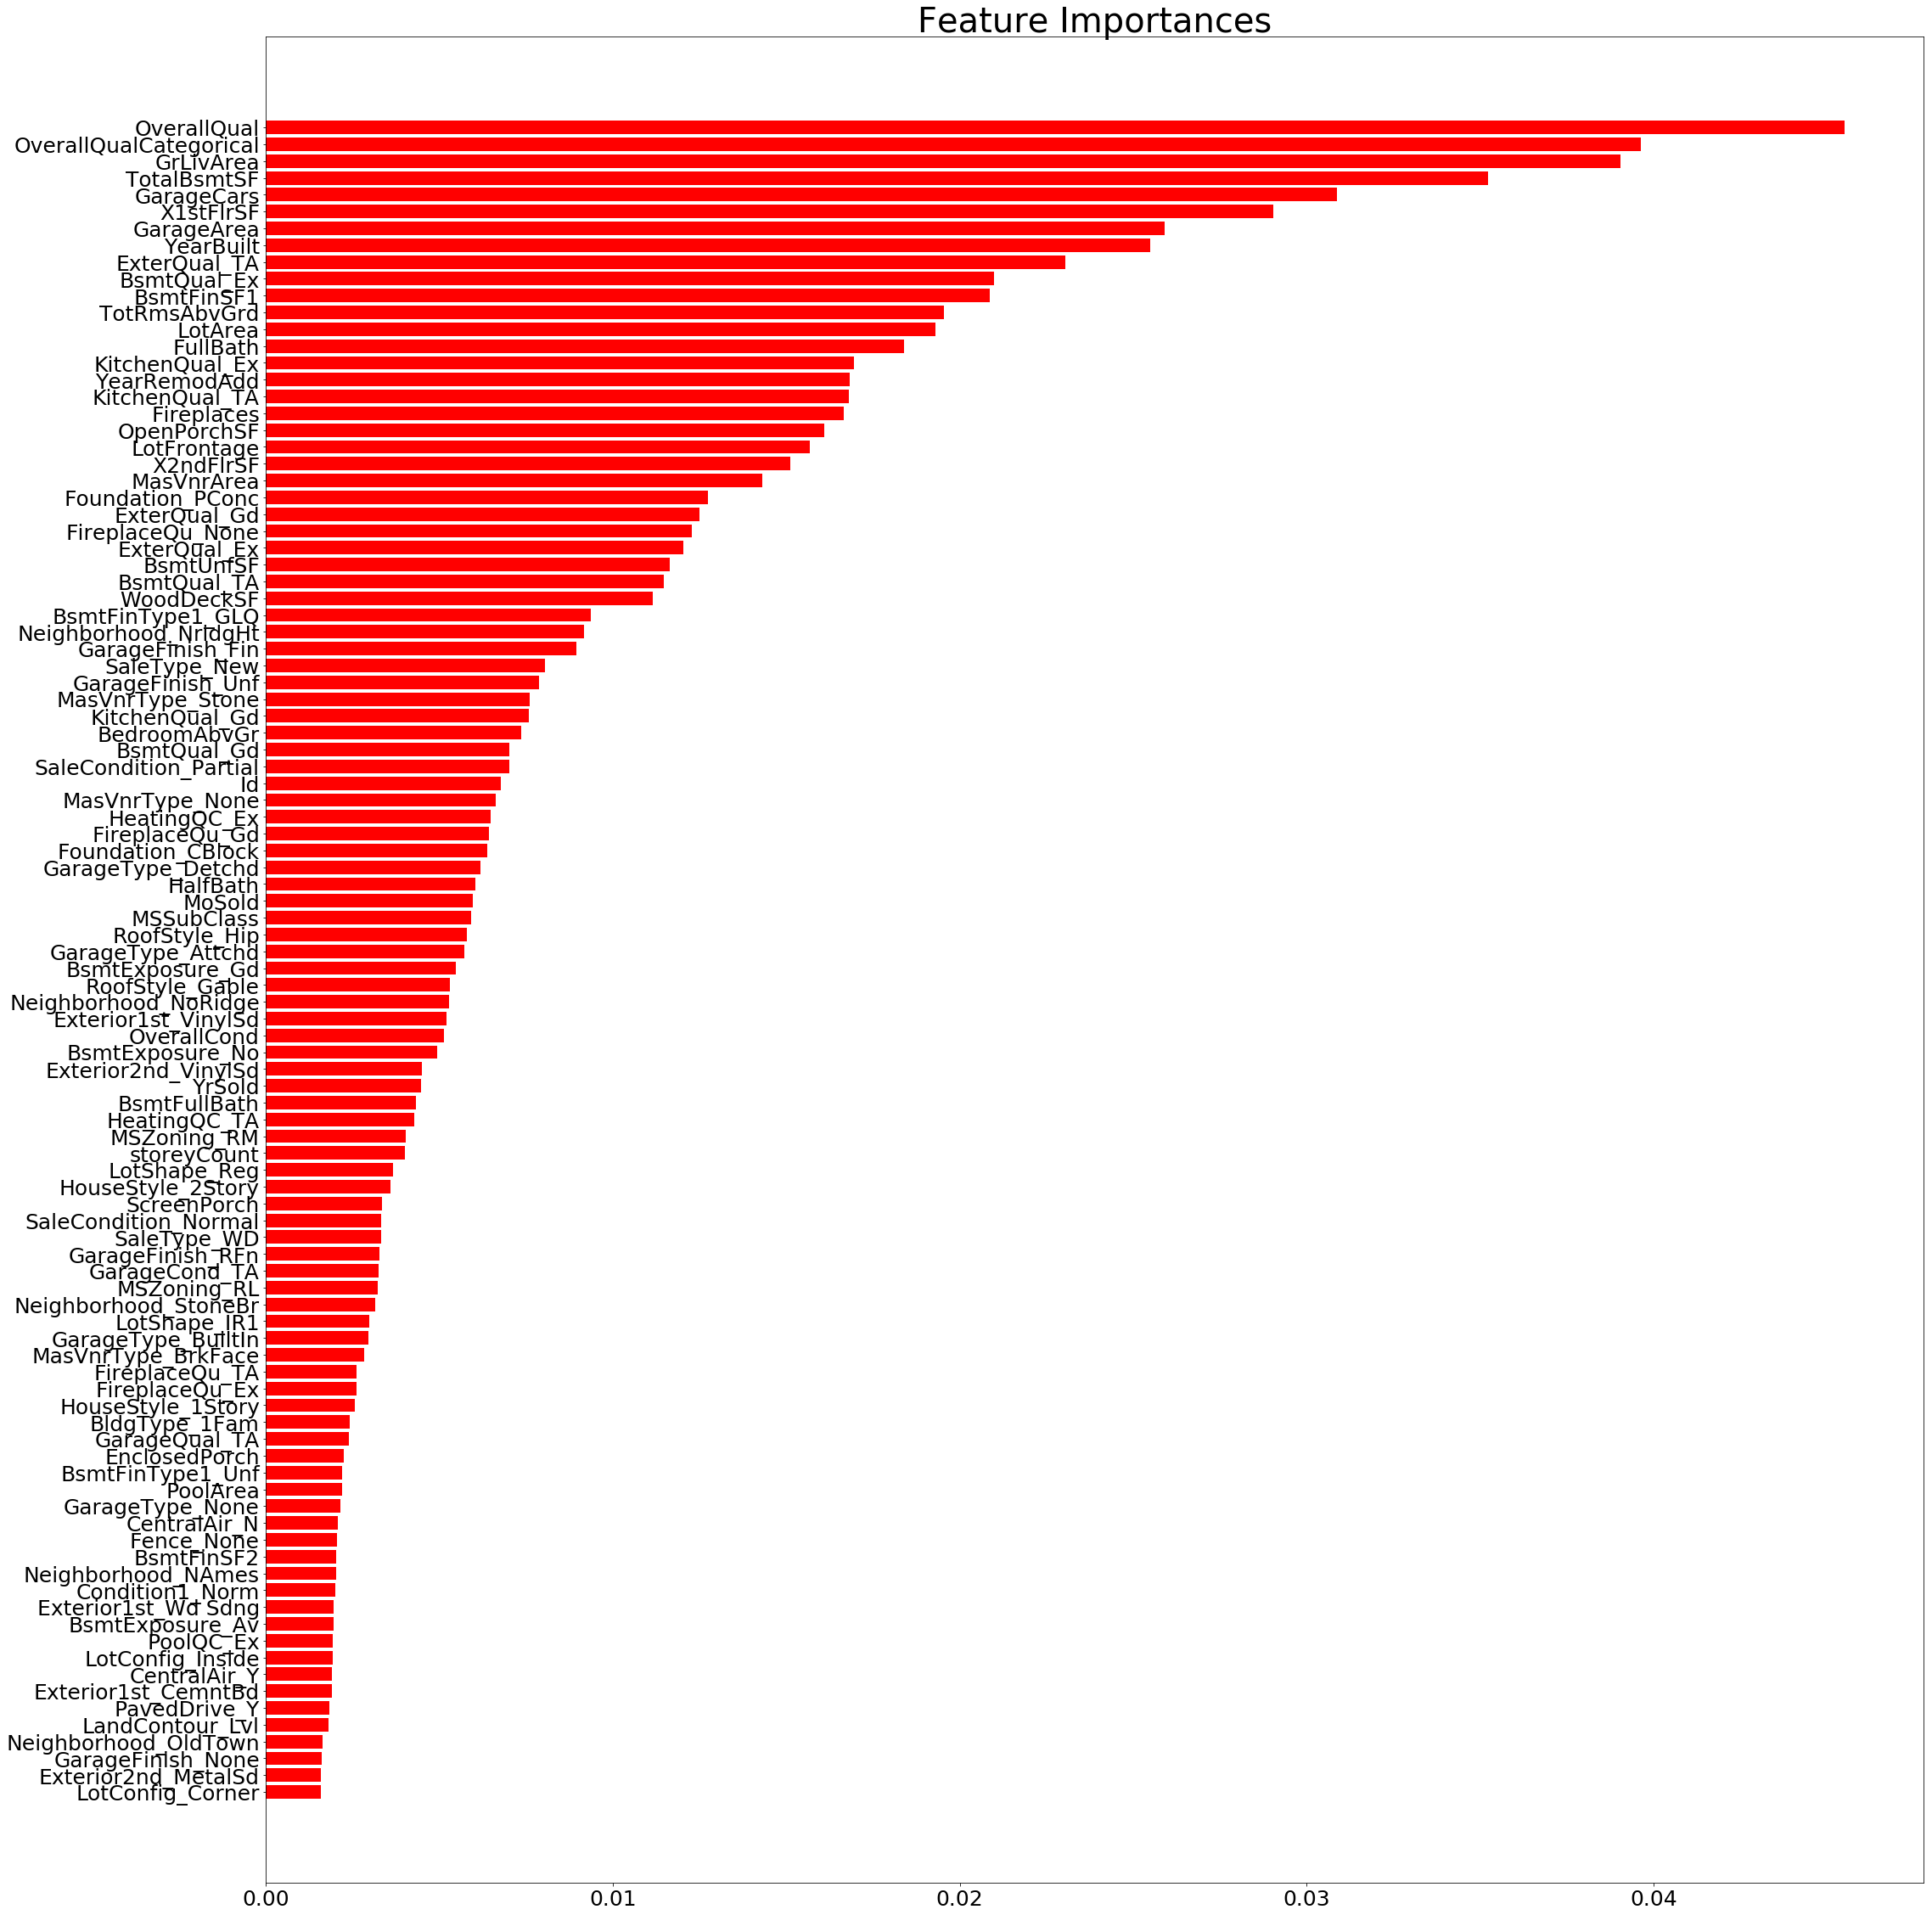

In [13]:
# Okay, but I want to see predictors ranked by importance. 
importances = randomForestReg2.feature_importances_
indices = np.argsort(importances)
print(train_test_x.shape) # 365 rows by 304 columns
print(indices.shape) # so we get 304 features in our random forest. Out of 304 columns in the X matrix. Makes sense!
featureInOrder = list(train_test_x.columns[indices]) # ordered in the order of importance. 
importaInOrder = importances[indices]
displayHowMany = 100
featureInOrder = featureInOrder[len(featureInOrder)-displayHowMany:len(featureInOrder)]
importaInOrder = importaInOrder[len(importaInOrder)-displayHowMany:len(importaInOrder)]

plt.figure(figsize=(35,40))
plt.title('Feature Importances', fontsize=40)
plt.barh(range(len(importaInOrder)), importaInOrder, color='r')
plt.tick_params(axis='both', which='major', labelsize=25)
plt.yticks(range(len(featureInOrder)), featureInOrder)
plt.show()

(365, 303)
(303,)


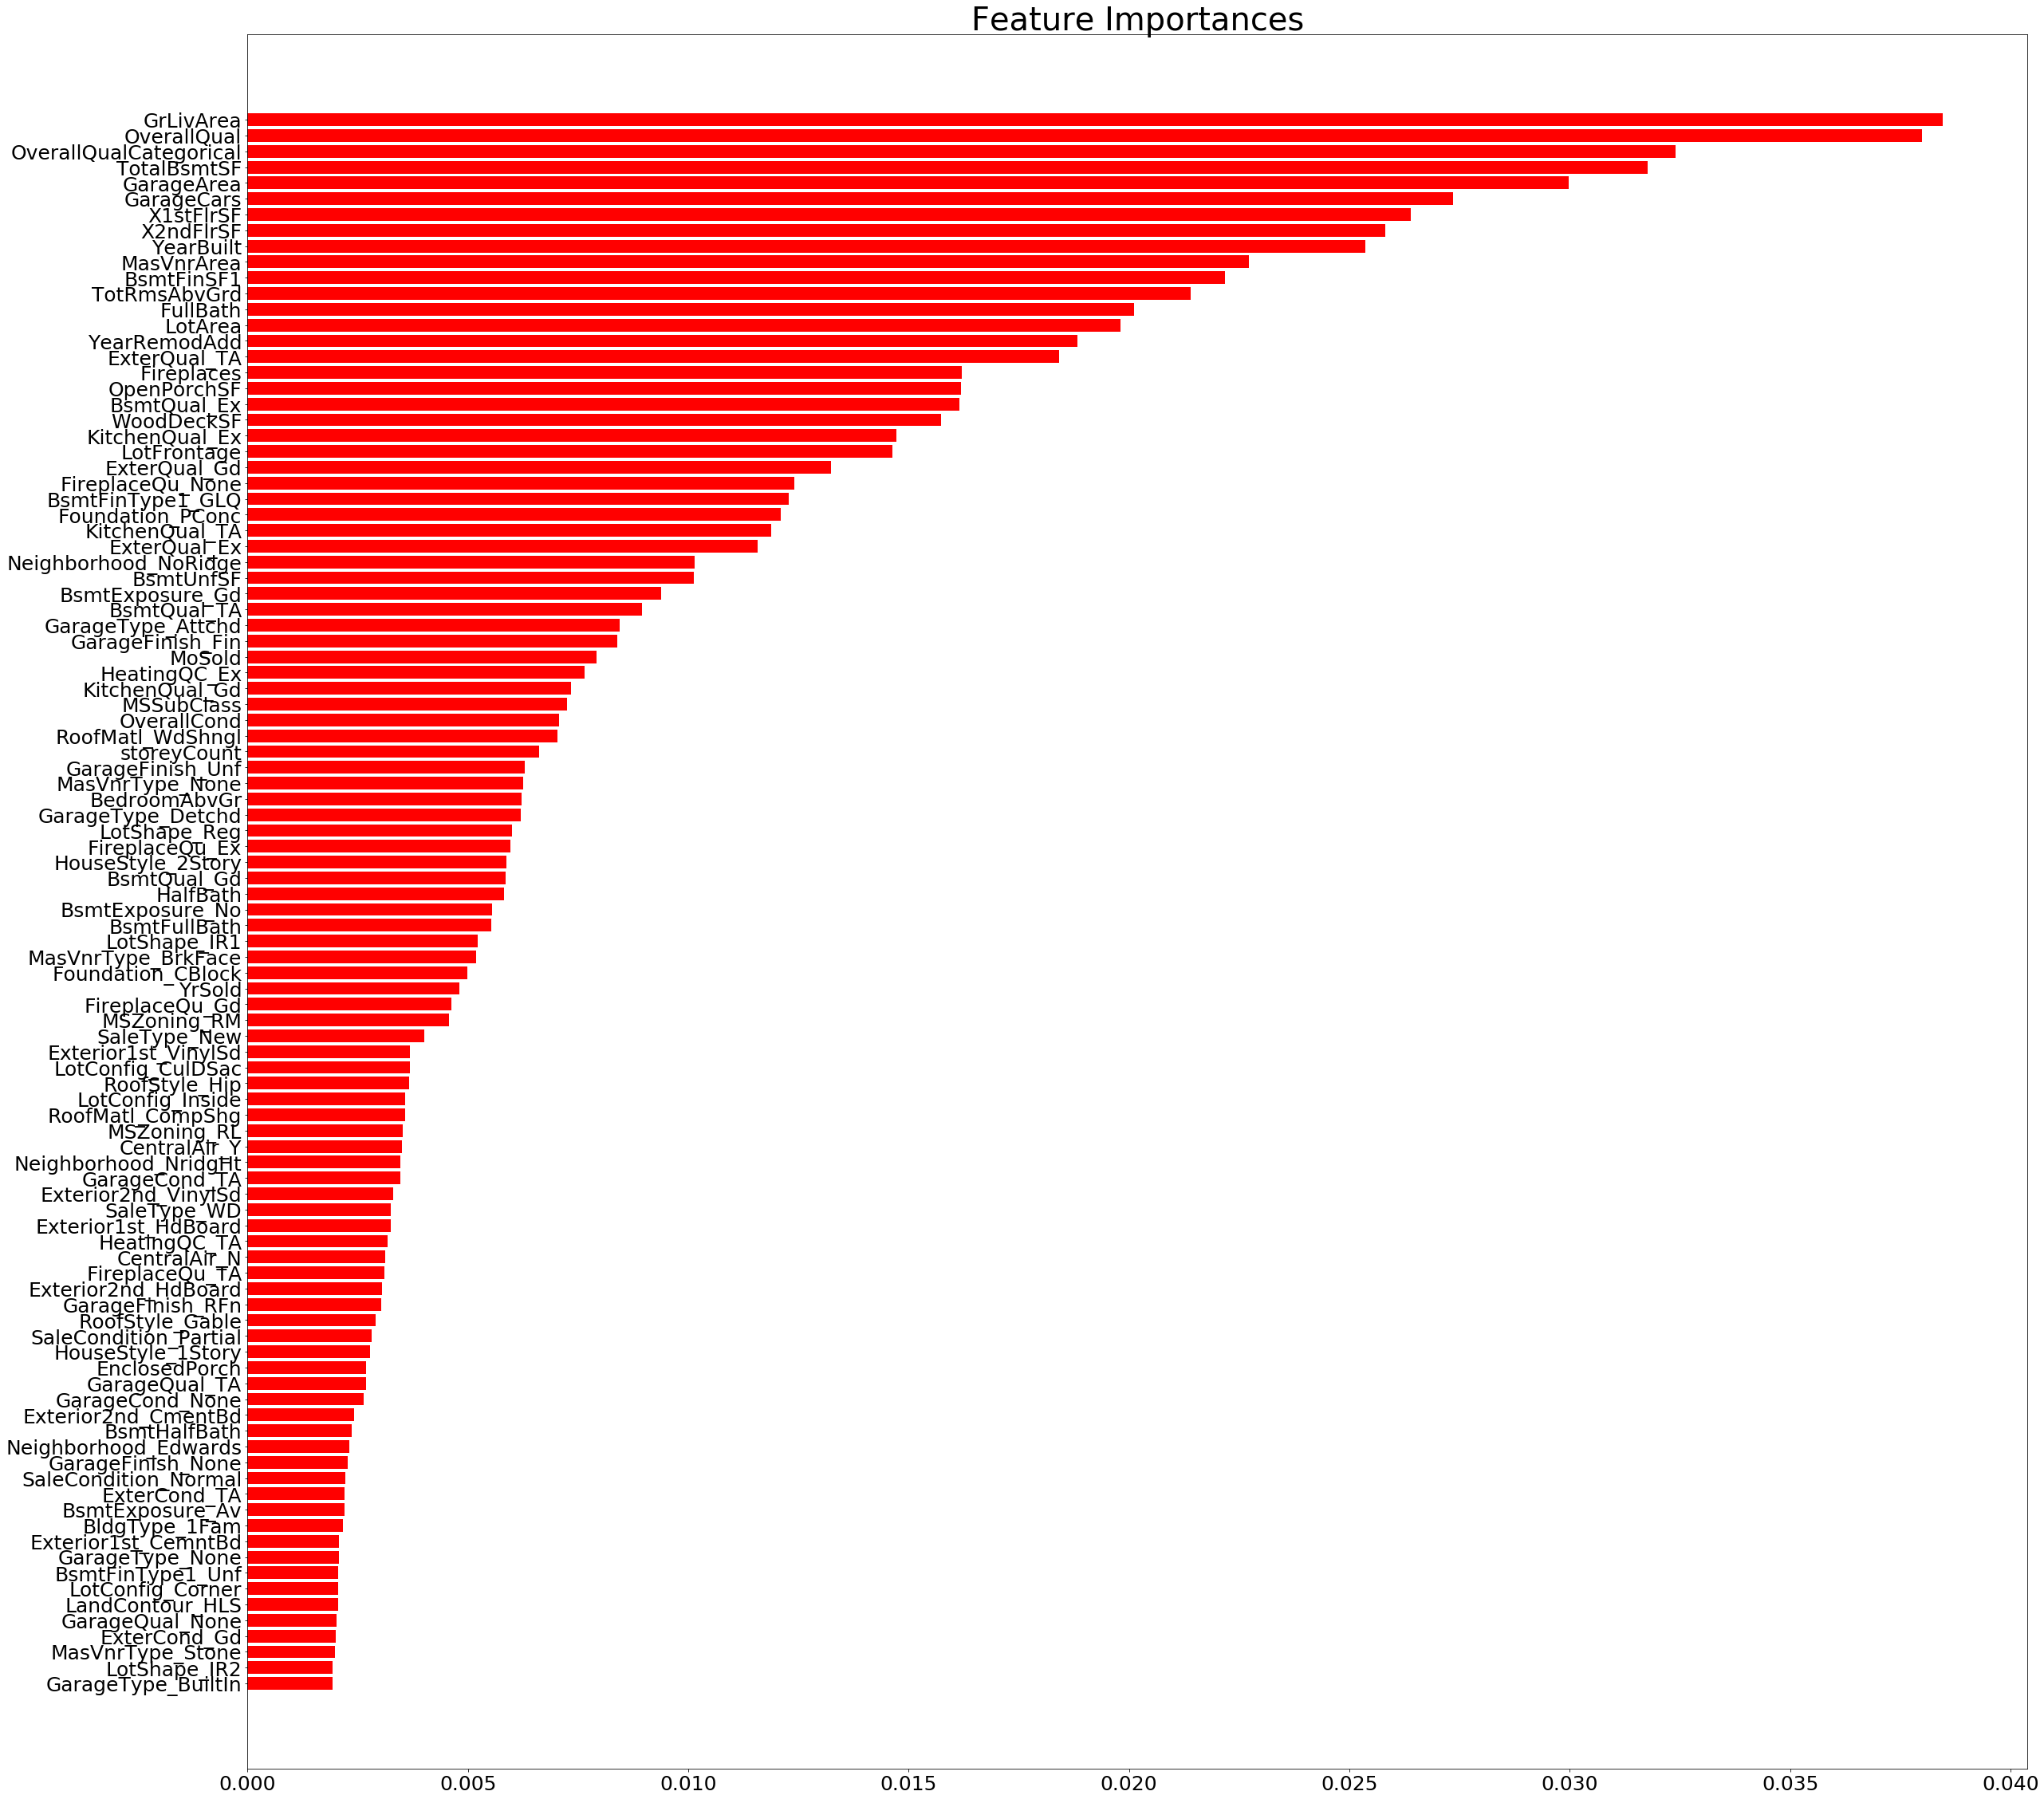

In [218]:
finOrder = featureInOrder[::-1]
finOrder[0:40]

['GrLivArea',
 'OverallQual',
 'OverallQualCategorical',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'X1stFlrSF',
 'X2ndFlrSF',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotRmsAbvGrd',
 'FullBath',
 'LotArea',
 'YearRemodAdd',
 'ExterQual_TA',
 'Fireplaces',
 'OpenPorchSF',
 'BsmtQual_Ex',
 'WoodDeckSF',
 'KitchenQual_Ex',
 'LotFrontage',
 'ExterQual_Gd',
 'FireplaceQu_None',
 'BsmtFinType1_GLQ',
 'Foundation_PConc',
 'KitchenQual_TA',
 'ExterQual_Ex',
 'Neighborhood_NoRidge',
 'BsmtUnfSF',
 'BsmtExposure_Gd',
 'BsmtQual_TA',
 'GarageType_Attchd',
 'GarageFinish_Fin',
 'MoSold',
 'HeatingQC_Ex',
 'KitchenQual_Gd',
 'MSSubClass',
 'OverallCond',
 'RoofMatl_WdShngl']

In [126]:
# We need to do a quick XGBRegressor
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(train_train_x, train_train_y)
print(model.score(train_train_x, train_train_y))
y_pred = model.predict(train_test_x)
y_test = train_test_y.astype(float).values
print(model.score(train_test_x, train_test_y))

0.965326056775
0.893181941351


In [55]:
# Grid search on Lasso
# look how to choose fraction parameters range

from sklearn.model_selection import GridSearchCV
lasso = Lasso()

grid_param2 = [{'weights': ['uniform', 'distance'], 'alpha': range(0, 1), 'p': [1, 2]}]
grid_param2 = [{'alpha': np.arange(0.001, 0.01, 0.001)}]

para_search2 = GridSearchCV(lasso, grid_param2, cv=5, return_train_score=True)
para_search2.fit(X_train,y_train)
para_search2.cv_results_
para_search2.grid_scores_

print(para_search2.best_score_)
print(para_search2.best_params_)

lasso_best = para_search2.best_estimator_
print(lasso_best.fit(X_train,y_train))
print(lasso_best.score(X_train,y_train))

In [169]:
train = pd.read_csv('./data/train_superclean.csv')
print(train.shape)
 # Drop categories that have poor representation in random sub-samples or that are not helpful (e.g. MiscFeature)
train = train.drop(['Heating', 'Electrical', 'Condition1', 'Condition2', 'MiscFeature', 'ExterCond', 
                    'Exterior1st', 'Exterior2nd', 'RoofMatl'], axis=1)

def trainTestXYSplit(train, random_key): 
    train_with_dummies = pd.get_dummies(train)
    # Eliminate sparse categorical likely to not be represented out of sample. 
    train_with_dummies = train_with_dummies.drop(['Utilities_NoSeWa', 
       'Foundation_Wood', 'Functional_Maj2', 'Functional_Sev', 'GarageQual_Po', 'GarageCond_Gd', 'PoolQC_Gd',
       'SaleType_Con'], axis=1)  
    
    train_train, train_test = train_test_split(train_with_dummies, test_size = 0.25, random_state = random_key)
    train_train_x = train_train.drop(['SalePrice'], axis=1)
    train_train_y = train_train['SalePrice']
    # We want to know if we have some unrepresented values in the train_test. 
    # As a diagnostic, print all X columns that have all zero in the train test (dummies that are not represented in test).
    train_test_x = train_test.drop(['SalePrice'], axis=1)
    train_test_y = train_test['SalePrice']
    return train_train_x, train_train_y, train_test_x, train_test_y

def testUnrepresentedDummies(train):
    for random_key in np.arange(1,100,10):
        print("RandomKey: {} generates new split ...".format(random_key))
        train_train_x, train_train_y, train_test_x, train_test_y = trainTestXYSplit(train, random_key)
        
        isZeroCols = (train_test_x == 0).all(axis=0)
        #print(isZeroCols)
        print(train_test_x.shape)
        print(train_test_x.columns.shape)
        print(train_test_x.columns[isZeroCols].shape)
        print(train_test_x.columns[isZeroCols])
    train_train_x.to_csv('./data/debug_train_test_x.csv')

print(train.shape)
testUnrepresentedDummies(train) 

(1460, 82)
(1460, 73)
RandomKey: 1 generates new split ...
(365, 219)
(219,)
(0,)
Index([], dtype='object')
RandomKey: 11 generates new split ...
(365, 219)
(219,)
(9,)
Index(['Street_Grvl', 'LotShape_IR3', 'RoofStyle_Shed', 'BsmtCond_Po',
       'Functional_Maj1', 'GarageQual_Ex', 'GarageCond_Ex', 'PoolQC_Fa',
       'SaleType_ConLw'],
      dtype='object')
RandomKey: 21 generates new split ...
(365, 219)
(219,)
(7,)
Index(['LotConfig_FR3', 'Neighborhood_Veenker', 'RoofStyle_Shed',
       'GarageType_CarPort', 'GarageQual_Ex', 'GarageCond_Ex', 'PoolQC_Ex'],
      dtype='object')
RandomKey: 31 generates new split ...
(365, 219)
(219,)
(11,)
Index(['PoolArea', 'RoofStyle_Flat', 'RoofStyle_Shed', 'BsmtCond_Po',
       'HeatingQC_Po', 'GarageQual_Ex', 'GarageQual_Gd', 'GarageCond_Ex',
       'PoolQC_Ex', 'PoolQC_Fa', 'SaleType_ConLw'],
      dtype='object')
RandomKey: 41 generates new split ...
(365, 219)
(219,)
(9,)
Index(['RoofStyle_Mansard', 'RoofStyle_Shed', 'Foundation_Stone',
      

In [179]:
# Generalize grid search
from sklearn.model_selection import GridSearchCV

train = pd.read_csv('./data/train_superclean.csv')
print(train.shape)
 # Drop categories that have poor representation in random sub-samples or that are not helpful (e.g. MiscFeature)
train = train.drop(['Heating', 'Electrical', 'Condition1', 'Condition2', 'MiscFeature', 'ExterCond', 
                    'Exterior1st', 'Exterior2nd', 'RoofMatl', 'Neighborhood', 'SaleType'], axis=1)

def bestModelFromGrid(model, params, X, y):
    grid = GridSearchCV(model, params, error_score = 0)
    grid.fit(X, y)
    print("Best Accuracy: {0}".format(grid.best_score_)) # Mean cross-validated score of the best_estimator
    print("Best Parameters: {0}".format(grid.best_params_))
    print("Average Time to Fit (sec): {0}".format(round(grid.cv_results_['mean_fit_time'].mean(),3)))
    print("Average Time to Score (sec): {0}".format(round(grid.cv_results_['mean_score_time'].mean(),3)))
    return(grid.best_score_, grid.best_estimator_) # returns best model

# We need to integrate out the random_key in this matter of getting the best score.
# I need an rough idea of how stable the best estimate with, with respect to the choice of various random keys. 
def bestOverAllRandomKeys(train, model, grid_params):
    bestOnes = list()
    for random_key in np.arange(1,100, 10):
        print("RandomKey: {} generates new split ...".format(random_key))
        train_train_x, train_train_y, train_test_x, train_test_y = trainTestXYSplit(train, random_key)
        curBest, _ = bestModelFromGrid(model, grid_params, train_train_x, np.log(train_train_y))
        print(curBest)
        bestOnes.append(curBest)
    print(np.mean(bestOnes))
    print(np.std(bestOnes))  

from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 1000)
grid_params = [{'max_depth': [10,20,50]}]
bestOverAllRandomKeys(train, model, grid_params)

(1460, 82)
RandomKey: 1 generates new split ...


ValueError: labels ['SaleType_Con'] not contained in axis

In [144]:
# These are the best scores over our grid. 
bestOnes = [0.842841,0.833900,0.863649,0.811017,0.831388,0.858024,0.873958,0.858295,0.864841, 0.862445]
print(np.mean(bestOnes))
print(np.std(bestOnes))

0.8500358
0.018561075318


In [193]:
# All done with one given random_key
train = pd.read_csv('./data/train_superclean.csv')
print(train.shape)
 # Drop categories that have poor representation in random sub-samples or that are not helpful (e.g. MiscFeature)
train = train.drop(['Heating', 'Electrical', 'Condition1', 'Condition2', 'MiscFeature', 'ExterCond', 
                    'Exterior1st', 'Exterior2nd', 'RoofMatl', 'Neighborhood', 'SaleType'], axis=1) 

train_with_dummies = pd.get_dummies(train)
train_train, train_test = train_test_split(train_with_dummies, test_size = 0.25, random_state = 5)
train_train_x = train_train.drop(['SalePrice'], axis=1)
train_train_y = train_train['SalePrice']
train_test_x = train_test.drop(['SalePrice'], axis=1)
train_test_y = train_test['SalePrice']
    
# apply best model to XGBRegressor
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 1000) 
grid_params = [{'max_depth': [5,10,20,50]}]
_, bestModel = bestModelFromGrid(model, grid_params, train_train_x, np.log(train_train_y))

(1460, 82)
Best Accuracy: 0.852555099337564
Best Parameters: {'max_depth': 5}
Average Time to Fit (sec): 3.717
Average Time to Score (sec): 0.016


In [210]:
def rmseSimple(model, X, y, isYLog=True):
    y_pred = model.predict(X)
    if(isYLog):
        rmse = np.sqrt(np.mean((y-y_pred)**2))
    else:
        rmse = np.sqrt(np.mean((np.log(y)-np.log(y_pred))**2))
    return(rmse)

import xgboost as xgb
xgboo = xgb.XGBRegressor()
xgboo.fit(train_train_x,np.log(train_train_y))
#print(rmseSimple(bestModel, train_train_x, np.log(train_train_y)))
print(rmseSimple(xgboo, train_train_x, np.log(train_train_y)))


model = XGBRegressor(n_estimators = 1000, max_depth=5)
model.fit(train_train_x, np.log(train_train_y))
print(rmseSimple(model, train_train_x, np.log(train_train_y)))
print('Model1:', model)
def bestModelFromGrid(model, params, X, y):
    grid = GridSearchCV(model, params, error_score = 0)
    grid.fit(X, y)
    print("Best Accuracy: {0}".format(grid.best_score_)) # Mean cross-validated score of the best_estimator
    print("Best Parameters: {0}".format(grid.best_params_))
    print("Average Time to Fit (sec): {0}".format(round(grid.cv_results_['mean_fit_time'].mean(),3)))
    print("Average Time to Score (sec): {0}".format(round(grid.cv_results_['mean_score_time'].mean(),3)))
    return(grid.best_score_, grid.best_estimator_) # returns best model

model = XGBRegressor(n_estimators = 1000) 
grid_params = [{'max_depth': [5,10]}] # this is our grid, we vary one parameter at a time to generate train/test RMSE curves
_, bestModel = bestModelFromGrid(model, grid_params, train_train_x, np.log(train_train_y))
print(rmseSimple(bestModel, train_train_x, np.log(train_train_y)))
print('Model2:', bestModel)

0.0875605753021
0.00148780917843
Model1: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Best Accuracy: 0.8575409680566155
Best Parameters: {'max_depth': 5}
Average Time to Fit (sec): 5.454
Average Time to Score (sec): 0.026
0.00148780917843
Model2: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [211]:
print(bestModel)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [208]:
print(rmseSimple(bestModel, train_test_x, np.log(train_test_y)))

[ 12.3290329   12.15087032  12.16041565  11.34839344  11.76467705
  12.13510513  12.04557133  11.76478958  12.56037712  12.29734135
  11.77027607  12.01073742  12.44018173  11.50759983  11.95839024
  12.35531521  11.83180618  12.0306673   12.25577259  12.33385944
  12.21582127  12.44188499  11.75062561  12.30712605  12.43842888
  11.71383667  12.74230957  12.50081253  12.53494453  12.48517799
  12.46711445  12.10626888  11.70222092  11.79108334  11.54251575
  12.47199535  11.96569633  12.35040283  11.66342449  11.39094925
  12.33453655  11.82176971  11.85399914  12.46652317  11.9142971
  12.42088318  12.18988705  11.69680309  11.9260416   11.65941334
  13.02738476  12.17846107  12.09279919  11.34436607  12.27577019
  11.52314568  12.00649643  12.55989265  12.73123455  11.90143108
  11.71649361  12.49192238  12.19707012  12.72603893  11.91324234
  12.01998806  12.36933136  11.65576267  12.1511755   11.988307
  12.38099289  11.93191338  11.35431576  11.70448112  12.09936142
  11.8310442 

In [145]:
# apply best model to SVR
#from sklearn.svm import SVR
#model = SVR(epsilon=0, kernel='rbf')
#grid_params = [{'C': [1,5,10,20]}]
#bestModel = bestModelFromGrid(model, grid_params, train_train_x, train_train_y)
#print(bestModel.score(train_test_x, train_test_y)) # I am getting negative accuracy ??!!

Best Accuracy: 0.7919887976910931
Best Parameters: {'max_depth': 20}
Average Time to Fit (sec): 15.064
Average Time to Score (sec): 0.072


AttributeError: 'tuple' object has no attribute 'score'